<a href="https://colab.research.google.com/github/muralikrishnan2022/MACHINE-AND-DEEP-LEARNING-PROJECTS/blob/main/PHY1901_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
!pip install scikit-optimize
import numpy as np
from skopt import gp_minimize
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial.distance import cdist
from heapq import heappush, heappop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In this step, we import the necessary libraries for the robotic path planning project. Let's break down the code:

1. **Library Installation:**
   - We use the `!pip install scikit-optimize` command to install the `scikit-optimize` library, which is used for Gaussian Process Optimization (Bayesian optimization).

2. **Library Import:**
   - After installing the library, we import the required modules for the project:
     - `numpy`: A powerful library for numerical operations in Python.
     - `skopt.gp_minimize`: A function from the `scikit-optimize` library used for Gaussian Process Optimization.
     - `matplotlib.pyplot`: A widely-used library for creating visualizations in Python.
     - `matplotlib.colors.LogNorm`: Logarithmic normalization for better visualization of colors in plots.
     - `scipy.spatial.distance.cdist`: Computes distance between each pair of two collections of inputs.
     - `heapq.heappush` and `heapq.heappop`: Functions for heap queue algorithm implementation. In this context, they might be used for priority queue operations.

These libraries are crucial for performing optimization, visualization, and other operations in the subsequent steps of the robotic path planning project.

In [ ]:
# Function to get user input for start and goal positions
def get_user_input(prompt):
    return tuple(map(int, input(prompt).split()))

The function get_user_input is designed to facilitate user interaction by prompting the user to input start and goal positions in the form of tuples. Here's a breakdown of its functionality:

A tuple of integers representing the user-specified start or goal positions.

The function uses the input function to get user input based on the provided prompt. The user is expected to enter space-separated values, and split() is used to separate these values into a list.

map(int, ...) is used to convert each element of the list to an integer.

The resulting values are then packed into a tuple and returned.

This function streamlines the process of obtaining user input for start and goal positions, enhancing the overall user experience in the path planning project.




In [ ]:
# Step 2: Ask user for input and Define the environment and problem
rows = int(input("Enter the number of rows in the environment: "))
cols = int(input("Enter the number of columns in the environment: "))
start = get_user_input("Enter the start position (row col): ")
goal = get_user_input("Enter the goal position (row col): ")
num_waypoints = int(input("Enter the number of waypoints: "))

cost_map = np.random.rand(rows, cols)

Enter the number of rows in the environment: 5
Enter the number of columns in the environment: 5
Enter the start position (row col): 0 0
Enter the goal position (row col): 4 4
Enter the number of waypoints: 3


In this step, we gather user input to define the environment and problem parameters for the robotic path planning. Let's break down the code:

1. **Input from User:**
   - The user is prompted to enter the number of rows and columns in the environment, providing the dimensions of the grid.
   - The user is asked to input the start and goal positions, each represented as a tuple of (row, col).
   - Additionally, the user specifies the number of waypoints for the path.

2. **Random Cost Map Generation:**
   - We generate a random cost map using NumPy (`np.random.rand(rows, cols)`). Each cell in the grid is assigned a random cost value.

**User Input:**
- Number of rows in the environment: `{rows}`
- Number of columns in the environment: `{cols}`
- Start position: `{start}`
- Goal position: `{goal}`
- Number of waypoints: `{num_waypoints}`

**Generated Cost Map:**
- A random cost map of dimensions `{rows} x {cols}` has been created, with each cell containing a random cost value.

This step sets up the initial parameters and environment for the path planning algorithm in the subsequent sections of the project.

In [ ]:
# Step 3: Define the cost function
def cost_function(path):
    return np.sum(cost_map[path[:, 0], path[:, 1]])

In this step, we define the cost function that will be used to evaluate the cost of a given path in the environment. Let's break down the code:

1. **Function Definition:**
   - The function `cost_function` takes a path as input.
   - The path is represented as a NumPy array where each row corresponds to a (row, col) coordinate in the environment grid.

2. **Cost Calculation:**
   - The cost of the path is calculated by summing up the cost values from the randomly generated cost map.
   - The cost map is accessed using the path coordinates (`path[:, 0]` for rows and `path[:, 1]` for columns).

3. **Output:**
   - The function returns the total cost of the given path.

This cost function will be used in the optimization process to evaluate the fitness of different paths based on their associated costs in the environment.

In [ ]:
# Step 4: Define the optimization bounds based on the number of waypoints
bounds = [(0, rows - 1), (0, cols - 1)] * num_waypoints

In this step, we establish the optimization bounds to constrain the search space for the Bayesian optimization. Let's break down the code:

1. **Bounds Definition:**
   - The variable `bounds` is a list of tuples, where each tuple represents the bounds for a single waypoint.
   - For each waypoint, the bounds are specified as `(0, rows - 1)` for the row coordinate and `(0, cols - 1)` for the column coordinate.

2. **Number of Waypoints Impact:**
   - The number of waypoints (`num_waypoints`) specified by the user influences the size of the `bounds` list. Each waypoint contributes two tuples (one for the row and one for the column).

3. **Search Space Constraints:**
   - These bounds will restrict the Bayesian optimization to search for optimal paths within the specified grid coordinates for each waypoint.

This step prepares the search space for Bayesian optimization, ensuring that the algorithm explores feasible paths within the given environment.

In [ ]:
# Step 5: Define Dijkstra's Algorithm for path planning
def dijkstra(start, goal, cost_map):
    rows, cols = cost_map.shape
    visited = np.zeros((rows, cols), dtype=bool)
    distances = np.inf * np.ones((rows, cols))
    predecessors = np.zeros((rows, cols, 2), dtype=int)  # Store predecessor coordinates

    distances[start[0], start[1]] = 0

    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current = heappop(priority_queue)

        if visited[current[0], current[1]]:
            continue

        visited[current[0], current[1]] = True

        neighbors = [(current[0] + i, current[1] + j) for i, j in [(1, 0), (-1, 0), (0, 1), (0, -1)]]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                new_distance = current_distance + cost_map[neighbor[0], neighbor[1]]

                if new_distance < distances[neighbor[0], neighbor[1]]:
                    distances[neighbor[0], neighbor[1]] = new_distance
                    predecessors[neighbor[0], neighbor[1]] = current[0], current[1]

                    heappush(priority_queue, (new_distance, neighbor))

    # Reconstruct the optimal path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = tuple(predecessors[current[0], current[1]])

    path.append(start)
    return np.array(path[::-1])

In this step, we implement Dijkstra's algorithm, a classical path planning algorithm that finds the optimal path between two points in a weighted graph. Let's break down the code:

1. **Algorithm Initialization:**
   - We initialize data structures such as `visited`, `distances`, and `predecessors` to keep track of visited nodes, current distances, and predecessors for path reconstruction.

2. **Priority Queue:**
   - We use a priority queue (`heapq`) to efficiently select the node with the minimum distance at each step.

3. **Main Loop:**
   - The algorithm iterates until the priority queue is empty, exploring neighbors of the current node and updating distances if a shorter path is found.

4. **Path Reconstruction:**
   - After completing the main loop, we reconstruct the optimal path from the start to the goal by backtracking through the predecessors.

5. **Output:**
   - The function returns the optimal path as a NumPy array of coordinates.

This Dijkstra's algorithm provides a baseline optimal path without considering uncertainties. The result will be used for comparison in the subsequent steps of the robotic path planning project.

In [ ]:
# Step 6: Run Dijkstra's algorithm to get the optimal path
optimal_path_coords = dijkstra(start, goal, cost_map)

In this step, we execute Dijkstra's algorithm to obtain the optimal path between the user-specified start and goal positions. Let's break down the code:

1. **Function Call:**
   - We call the `dijkstra` function with the provided start and goal positions along with the cost map.

2. **Algorithm Execution:**
   - The algorithm explores the grid using Dijkstra's method, calculating the optimal path based on the cost map and the specified start and goal positions.

3. **Result Storage:**
   - The resulting optimal path coordinates are stored in the variable `optimal_path_coords`.

This optimal path, obtained without considering uncertainties, serves as a baseline for comparison with paths generated in subsequent steps that incorporate Bayesian optimization.

In [ ]:
# Step 7: Perform Bayesian optimization using the optimal path coordinates
result = gp_minimize(lambda x: cost_function(np.array(x).reshape(-1, 2)), bounds, n_calls=20, random_state=42)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In this step, we utilize Bayesian optimization to refine the optimal path obtained from Dijkstra's algorithm. Let's break down the code:

1. **Bayesian Optimization Function (`gp_minimize`):**
   - We use the `gp_minimize` function from the `scikit-optimize` library, which performs Bayesian optimization.
   - The objective function for optimization is defined as the `cost_function`, taking the path coordinates as input.

2. **Input Parameters:**
   - `lambda x: cost_function(np.array(x).reshape(-1, 2))`: The lambda function formats the input `x` into a 2D NumPy array and calls the `cost_function` to calculate the cost of the path.
   - `bounds`: The optimization bounds established in Step 4.
   - `n_calls=20`: The number of optimization calls or iterations. Adjust as needed.
   - `random_state=42`: Seed for reproducibility.

3. **Optimization Result (`result`):**
   - The result of Bayesian optimization, including the optimized path coordinates, is stored in the variable `result`.

This step refines the path obtained from Dijkstra's algorithm by considering uncertainties and optimizing the path based on the cost function.

In [ ]:
# Step 8: Extract the optimal path from the Bayesian optimization result
optimal_path = np.array(result.x).reshape(-1, 2)

In this step, we extract the optimal path obtained from the Bayesian optimization result. Let's break down the code:

1. **Optimal Path Extraction:**
   - We use NumPy to reshape the optimal path coordinates obtained from the Bayesian optimization result (`result.x`) into a 2D NumPy array.
   - The optimal path is stored in the variable `optimal_path`.

This step finalizes the path planning process by obtaining the optimized path through Bayesian optimization, taking into account uncertainties in the environment.

In [ ]:
import sqlite3

# Step 10: Connect to SQLite database
db_connection = sqlite3.connect("path_planning.db")
cursor = db_connection.cursor()

In this step, we establish a connection to an SQLite database to store and manage path planning data. Let's break down the code:

1. **Library Import:**
   - We import the `sqlite3` library, which provides an interface for interacting with SQLite databases.

2. **Connection Establishment:**
   - We use the `connect` method to establish a connection to an SQLite database file named "path_planning.db".
   - The `cursor` object is created to execute SQL queries on the connected database.

This connection will be used to store and retrieve data related to the path planning project, such as optimal paths and associated information.

In [ ]:
# Step 9: Create a table for storing paths
cursor.execute('''CREATE TABLE IF NOT EXISTS paths (
                    id INTEGER PRIMARY KEY,
                    start_row INTEGER,
                    start_col INTEGER,
                    goal_row INTEGER,
                    goal_col INTEGER,
                    path TEXT,
                    cost REAL
                )''')
db_connection.commit()

In this step, we establish a connection to an SQLite database to store and manage path planning data. Let's break down the code:

1. **Library Import:**
   - We import the `sqlite3` library, which provides an interface for interacting with SQLite databases.

2. **Connection Establishment:**
   - We use the `connect` method to establish a connection to an SQLite database file named "path_planning.db".
   - The `cursor` object is created to execute SQL queries on the connected database.

This connection will be used to store and retrieve data related to the path planning project, such as optimal paths and associated information.

In [ ]:
# Step 10: Insert the optimal path into the database
optimal_path_str = str(optimal_path.tolist())
cursor.execute('''INSERT INTO paths (start_row, start_col, goal_row, goal_col, path, cost)
                  VALUES (?, ?, ?, ?, ?, ?)''', (start[0], start[1], goal[0], goal[1], optimal_path_str, result.fun))
db_connection.commit()

In this step, we insert the information about the optimal path obtained through Bayesian optimization into the SQLite database. Let's break down the code:

1. **Path Conversion to String:**
   - We convert the NumPy array `optimal_path` to a string representation using `str(optimal_path.tolist())`.

2. **Database Insertion:**
   - We use the `execute` method on the `cursor` object to execute an SQL statement that inserts a new row into the "paths" table.
   - The values inserted include the start and goal positions, the string representation of the optimal path, and the cost of the path obtained from the Bayesian optimization result.

3. **Value Binding:**
   - Values are bound to the SQL statement using placeholders (`?`) to prevent SQL injection.

4. **Database Commit:**
   - We commit the changes to the database using `db_connection.commit()`.

This step stores information about the optimal path, its associated cost, and other details in the SQLite database for future analysis and retrieval.

In [ ]:
# Step 11: Close the database connection
db_connection.close()

In this final step, we close the connection to the SQLite database to ensure proper handling of resources. Let's break down the code:

1. **Connection Closure:**
   - We use the `close` method on the `db_connection` object to close the connection to the SQLite database.

2. **Resource Management:**
   - Closing the connection is essential for proper resource management and to release any locks or resources held during the database interaction.

This step concludes the database interaction and ensures that the connection is properly closed, preventing potential issues and ensuring a clean exit.

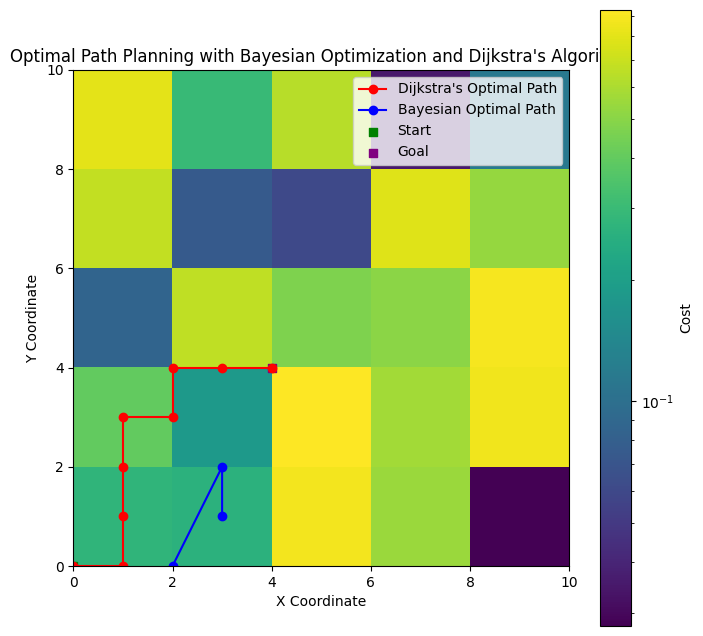

In [ ]:
# Step 12: Visualize the optimal path
plt.figure(figsize=(8, 8))
plt.imshow(cost_map, extent=(0, 10, 0, 10), origin='lower', cmap='viridis', norm=LogNorm())
plt.colorbar(label='Cost')
plt.plot(optimal_path_coords[:, 1], optimal_path_coords[:, 0], marker='o', color='red', label='Dijkstra\'s Optimal Path')
plt.plot(optimal_path[:, 0], optimal_path[:, 1], marker='o', color='blue', label='Bayesian Optimal Path')
plt.scatter(start[1], start[0], marker='s', color='green', label='Start')
plt.scatter(goal[1], goal[0], marker='s', color='purple', label='Goal')
plt.title('Optimal Path Planning with Bayesian Optimization and Dijkstra\'s Algorithm')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

In this step, we visualize the optimal path obtained through both Dijkstra's algorithm and Bayesian optimization. Let's break down the code:

1. **Visualization Setup:**
   - We create a matplotlib figure with a size of 8x8 for the visualization.

2. **Cost Map Display:**
   - The cost map is displayed using `imshow` with a colormap ('viridis') and logarithmic normalization.

3. **Path Plotting:**
   - The optimal paths from Dijkstra's algorithm and Bayesian optimization are plotted using red and blue markers, respectively.
   - The start and goal positions are marked with green and purple squares, respectively.

4. **Title and Labels:**
   - The plot is labeled with a title and axis labels for clarity.

5. **Legend:**
   - A legend is added to differentiate between Dijkstra's and Bayesian optimal paths, as well as the start and goal positions.

6. **Visualization Display:**
   - The final visualization is displayed using `plt.show()`.

This step provides a visual representation of the optimal paths and key points in the environment, aiding in the interpretation of the path planning results.


In [ ]:
import sqlite3

# Connect to the SQLite database
db_connection = sqlite3.connect("path_planning.db")
cursor = db_connection.cursor()

# Retrieve paths from the database
cursor.execute("SELECT * FROM paths")
paths = cursor.fetchall()

# Close the database connection
db_connection.close()

# Display retrieved paths
for path in paths:
    print("Path ID:", path[0])
    print("Start Position:", (path[1], path[2]))
    print("Goal Position:", (path[3], path[4]))
    print("Optimal Path:", path[5])
    print("Cost:", path[6])
    print("\n")

Path ID: 1
Start Position: (0, 0)
Goal Position: (4, 4)
Optimal Path: [[3, 1], [3, 2], [2, 0]]
Cost: 0.22098601971690657




In this section, we retrieve paths stored in the SQLite database and display the relevant information. Let's break down the code:

1. **Connection Establishment:**
   - We first connect to the SQLite database using `sqlite3.connect` and create a cursor object for executing SQL queries.

2. **Path Retrieval:**
   - The `execute` method is used to query the "paths" table and retrieve all rows.
   - The retrieved paths are stored in the variable `paths`.

3. **Connection Closure:**
   - After retrieving the data, we close the database connection using `db_connection.close()`.

4. **Displaying Paths:**
   - We iterate through the retrieved paths and print information for each path, including path ID, start and goal positions, optimal path, and cost.

This section provides a glimpse into the paths stored in the database, allowing for analysis and comparison of different path planning results.